In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from scipy.io import arff

data = arff.loadarff('PhishingData.arff')
df = pd.DataFrame(data[0])


df = df.apply(lambda x: x.str.decode('utf-8') if x.dtype == 'object' else x)
df['Result'] = df['Result'].astype(int)  # -1 (legitimate) -> 0, 1 (phishing) -> 1

In [8]:
# Exploratory Data Analysis (EDA)

print(df.columns)
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0                -1          1                  1                1   
1                 1          1                  1                1   
2                 1          0                  1                1   
3                 1          0                  1                1   
4                 1          0                 -1                1   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                       -1            -1                -1             -1   
1                        1            -1                 0              1   
2                        1            -1                -1             -1   
3                        1            -1                -1             -1   
4                        1            -1                 1              1   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                  

In [13]:
features = [
    'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'
       ]

In [14]:
X = df[features]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

Accuracy: 0.9530

Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.93      0.94      1428
           1       0.95      0.97      0.96      1889

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



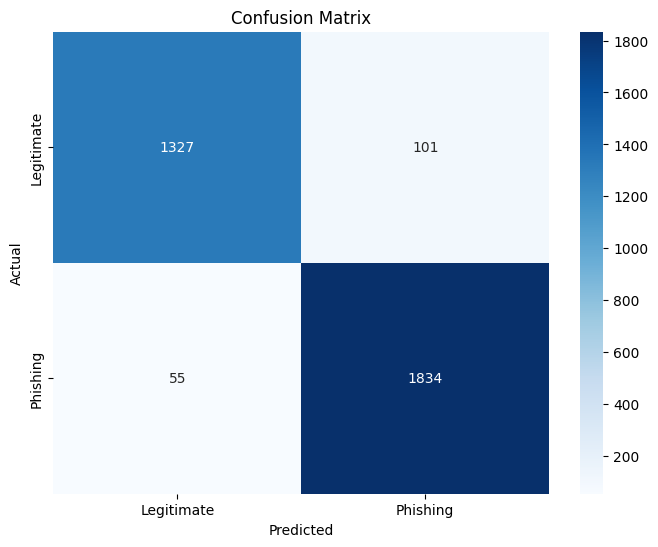


Feature Importance:
                        Feature  Importance
7                SSLfinal_State    0.367599
13                URL_of_Anchor    0.281521
25                  web_traffic    0.061715
6             having_Sub_Domain    0.059696
5                 Prefix_Suffix    0.051893
14                Links_in_tags    0.038295
15                          SFH    0.020126
12                  Request_URL    0.014235
8   Domain_registeration_length    0.014190
28       Links_pointing_to_page    0.009876


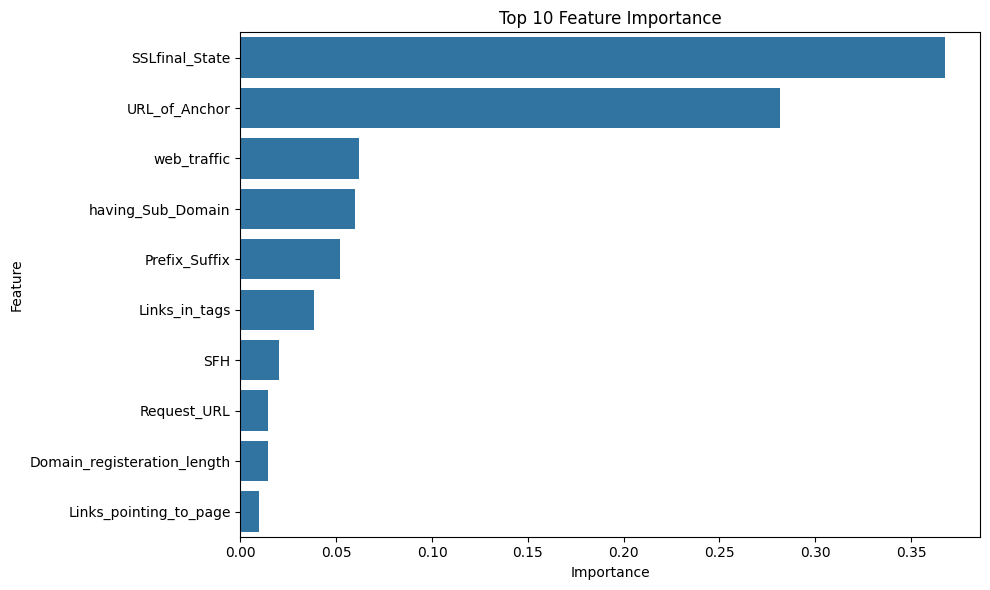

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a more detailed classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix for visualization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Exclude 'Result' from features
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance.head(10))  # Show top 10 important features

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [11]:
# Save the model
joblib.dump(model, 'phishing_detector_model.pkl')

# Download the model file
from google.colab import files
files.download('phishing_detector_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>